In [1]:
import pandas as pd
import seaborn as sb

import utils

In [2]:
%matplotlib inline

In [3]:
df = pd.read_json(utils.enriched_suas_fname)

In [4]:
df['raw_length'] = df['text'].str.len()

In [5]:
df['word_count'] = df['text'].str.lower().str.split().str.len()

In [9]:
df['unique_word_count'] = df['text'].apply(utils.unique_words_len)

In [10]:
df.head()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,college,...,president,rating _points,state_elected_from,text,year,year_first_inaugurated,years_in_office,raw_length,word_count,unique_word_count
0,25.299185,13.2219,21.3326,24.0493,26.9507,74.985507,13.333333,20.175564,57,None,...,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1789,1789,8,6687,1083,473
1,19.222901,11.9807,16.2845,41.5850,21.3036,62.759342,9.675000,16.747727,57,None,...,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1790,1789,8,8388,1403,609
2,21.635831,12.9107,18.2947,33.3320,24.2124,67.414287,11.083333,18.874508,57,None,...,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1791,1789,8,14136,2303,855
3,19.149153,12.2336,16.3275,40.2537,21.6351,62.389844,9.590164,17.165300,57,None,...,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1792,1789,8,12697,2098,809
4,18.936334,11.6051,16.1922,42.2972,21.0321,60.867484,9.000000,16.476169,57,None,...,George Washington,842,Virginia,Fellow-Citizens of the Senate and House of Rep...,1793,1789,8,11629,1965,809


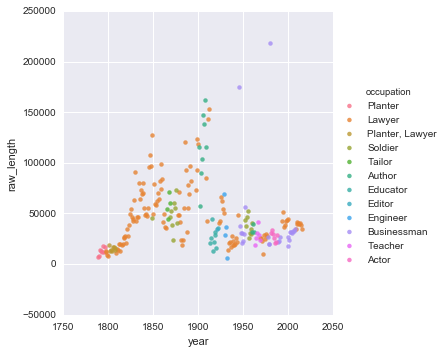

In [11]:
sb.lmplot('year', 'raw_length', data=df, hue='occupation', fit_reg=False)

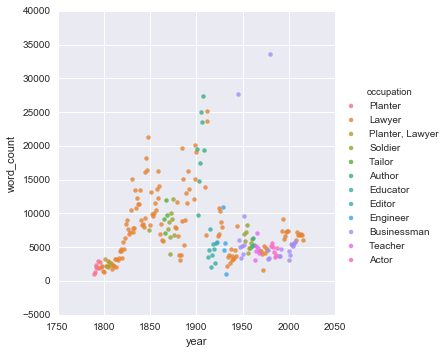

In [12]:
sb.lmplot('year', 'word_count', data=df, hue='occupation', fit_reg=False)

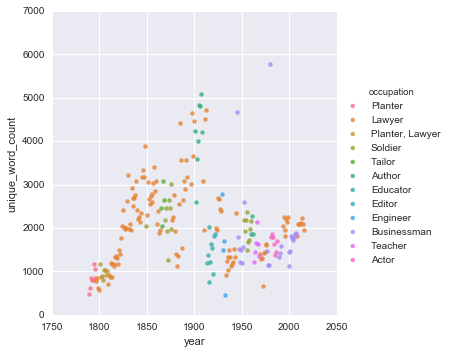

In [13]:
sb.lmplot('year', 'unique_word_count', data=df, hue='occupation', fit_reg=False)

In [14]:
agg_df = df.groupby(by=['president']).agg({
        'raw_length': 'mean',
        'word_count': 'mean',
        'unique_word_count': 'mean',
        'year': 'min', 
        'political_party': 'first',
        'occupation': 'first',
})

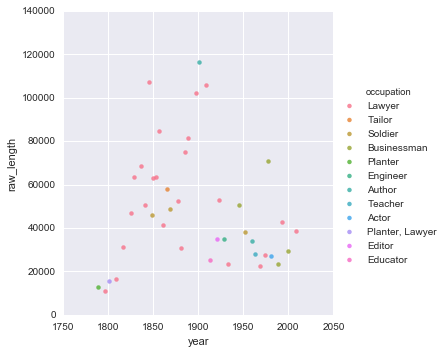

In [15]:
sb.lmplot('year', 'raw_length', data=agg_df, hue='occupation', fit_reg=False)

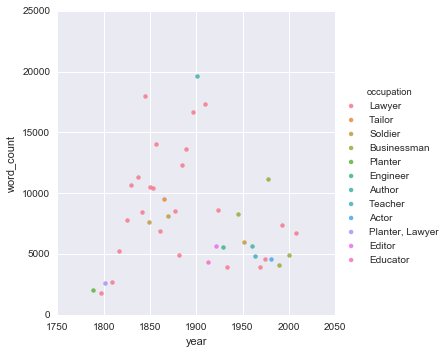

In [16]:
sb.lmplot('year', 'word_count', data=agg_df, hue='occupation', fit_reg=False)

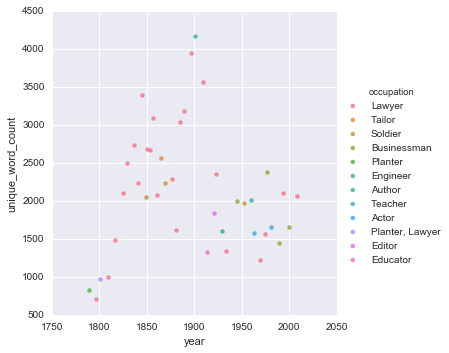

In [17]:
sb.lmplot('year', 'unique_word_count', data=agg_df, hue='occupation', fit_reg=False)